# Tarefa Competição

In [3]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from datetime import datetime

In [4]:
df0 = pd.read_csv("meteo_202109-202112.csv", na_filter = True)  
df1 = pd.read_csv("meteo_202201-202212.csv", na_filter = True)

In [5]:
df_meteo = pd.concat([df0, df1], ignore_index=True)

In [6]:
df_meteo.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


In [7]:
df_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   11688 non-null  int64  
 1   dt_iso               11688 non-null  object 
 2   city_name            11688 non-null  object 
 3   temp                 11688 non-null  float64
 4   feels_like           11688 non-null  float64
 5   temp_min             11688 non-null  float64
 6   temp_max             11688 non-null  float64
 7   pressure             11688 non-null  int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             11688 non-null  int64  
 11  wind_speed           11688 non-null  float64
 12  rain_1h              2435 non-null   float64
 13  clouds_all           11688 non-null  int64  
 14  weather_description  11688 non-null  object 
dtypes: float64(8), int64(4), object(3)
m

In [8]:
df_meteo.describe()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all
count,1.168800e+04,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,0.0,0.0,11688.000000,11688.000000,2435.000000,11688.000000
mean,1.651491e+09,16.406638,16.076164,14.433353,17.502990,1018.304073,NaN,NaN,76.619011,2.647688,0.884760,54.258214
std,1.214705e+07,5.715977,6.217605,4.960590,6.112344,6.109727,NaN,NaN,16.157421,1.458574,1.073453,40.443374
min,1.630454e+09,0.320000,-2.190000,-0.640000,1.330000,994.000000,NaN,NaN,19.000000,0.060000,0.100000,0.000000
25%,1.640973e+09,12.350000,11.760000,10.900000,12.930000,1015.000000,NaN,NaN,66.000000,1.610000,0.210000,7.000000
50%,1.651491e+09,15.760000,15.675000,14.540000,16.720000,1018.000000,NaN,NaN,81.000000,2.380000,0.450000,60.000000
75%,1.662009e+09,19.540000,19.560000,17.720000,20.700000,1022.000000,NaN,NaN,91.000000,3.400000,1.070000,98.000000
max,1.672528e+09,40.850000,41.330000,36.720000,41.450000,1034.000000,NaN,NaN,100.000000,11.100000,7.450000,100.000000


In [9]:
df_meteo.nunique()

dt                     11688
dt_iso                 11688
city_name                  1
temp                    2423
feels_like              2702
temp_min                 488
temp_max                 550
pressure                  41
sea_level                  0
grnd_level                 0
humidity                  82
wind_speed               771
rain_1h                  371
clouds_all               101
weather_description        8
dtype: int64

In [10]:
df3 = pd.read_csv("energia_202109-202112.csv", na_filter = False)
df4 = pd.read_csv("energia_202201-202212.csv", na_filter = False) # na_filter falso para evitar conversão de None para NaN

In [11]:
df_energia = pd.concat([df3, df4], ignore_index=True)

In [12]:
df_energia.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,None
1,2021-09-29,1,0.0,0.0,0.0,None
2,2021-09-29,2,0.0,0.0,0.0,None
3,2021-09-29,3,0.0,0.0,0.0,None
4,2021-09-29,4,0.0,0.0,0.0,None


In [13]:
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horario Economico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injecao na rede (kWh)    11016 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 516.5+ KB


In [14]:
df_energia.describe()

,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh)
count,11016.000000,11016.000000,11016.000000,11016.000000
mean,11.500000,0.202278,0.159714,0.117314
std,6.922501,0.349478,0.271792,0.176762
min,0.000000,0.000000,0.000000,0.000000
25%,5.750000,0.000000,0.000000,0.000000
50%,11.500000,0.000000,0.000000,0.000000
75%,17.250000,0.314000,0.288000,0.227000
max,23.000000,3.251000,6.978000,1.192000


In [15]:
df_energia.nunique()

Data                        459
Hora                         24
Normal (kWh)               1282
Horario Economico (kWh)     851
Autoconsumo (kWh)           752
Injecao na rede (kWh)         5
dtype: int64

### Juntar os dois Datasets de treino

In [16]:
df_meteo_temp = df_meteo.copy()
df_meteo_temp['dt_iso'] = list ( map(lambda x:( datetime.strptime(x, "%Y-%m-%d %H:%M:%S %z %Z") ).strftime("%Y-%m-%d %H:%M:%S"), df_meteo['dt_iso']) )
df_meteo_temp["dt_iso"] = pd.to_datetime(df_meteo_temp["dt_iso"])
df_meteo_temp

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,1672513200,2022-12-31 19:00:00,local,15.70,15.57,15.57,15.72,1018,NaN,NaN,86,5.56,3.58,100,moderate rain
11684,1672516800,2022-12-31 20:00:00,local,15.55,15.43,12.72,15.70,1018,NaN,NaN,87,4.47,4.20,100,heavy intensity rain
11685,1672520400,2022-12-31 21:00:00,local,13.45,13.28,12.23,13.99,1019,NaN,NaN,93,3.29,4.23,100,heavy intensity rain
11686,1672524000,2022-12-31 22:00:00,local,12.93,12.73,12.23,13.43,1019,NaN,NaN,94,1.49,3.90,100,moderate rain


In [17]:
df_final_v0 = pd.merge(df_energia, df_meteo_temp, left_on=['Data', 'Hora'], right_on=[df_meteo_temp['dt_iso'].dt.strftime('%Y-%m-%d'),df_meteo_temp['dt_iso'].dt.hour], how='outer')
df_final_v0


,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,dt_iso,city_name,temp,...,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-29,0,0.0,0.0,0.0,None,1632873600,2021-09-29 00:00:00,local,13.97,...,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds
1,2021-09-29,1,0.0,0.0,0.0,None,1632877200,2021-09-29 01:00:00,local,13.48,...,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds
2,2021-09-29,2,0.0,0.0,0.0,None,1632880800,2021-09-29 02:00:00,local,12.93,...,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds
3,2021-09-29,3,0.0,0.0,0.0,None,1632884400,2021-09-29 03:00:00,local,12.61,...,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds
4,2021-09-29,4,0.0,0.0,0.0,None,1632888000,2021-09-29 04:00:00,local,12.61,...,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,2021-09-28,19,NaN,NaN,NaN,NaN,1632855600,2021-09-28 19:00:00,local,16.77,...,15.72,17.32,1026,NaN,NaN,70,3.11,NaN,55,broken clouds
11684,2021-09-28,20,NaN,NaN,NaN,NaN,1632859200,2021-09-28 20:00:00,local,15.67,...,14.72,16.21,1027,NaN,NaN,72,2.97,NaN,70,broken clouds
11685,2021-09-28,21,NaN,NaN,NaN,NaN,1632862800,2021-09-28 21:00:00,local,15.67,...,14.72,15.70,1027,NaN,NaN,72,2.40,NaN,59,broken clouds
11686,2021-09-28,22,NaN,NaN,NaN,NaN,1632866400,2021-09-28 22:00:00,local,14.52,...,12.72,15.11,1027,NaN,NaN,77,2.11,NaN,37,scattered clouds


<Axes: >

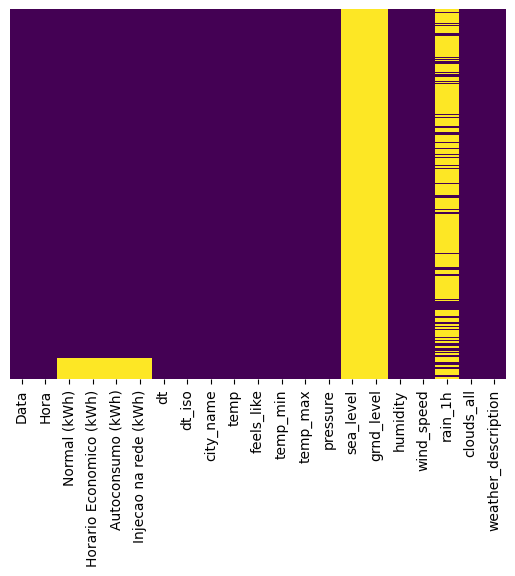

In [18]:
sns.heatmap(df_final_v0.isnull(),yticklabels= False,  cbar = False, cmap = 'viridis')

In [19]:
df_final_v1 = pd.merge(df_energia, df_meteo_temp, left_on=['Data', 'Hora'], right_on=[df_meteo_temp['dt_iso'].dt.strftime('%Y-%m-%d'),df_meteo_temp['dt_iso'].dt.hour], how='inner')
df_final_v1


,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,dt_iso,city_name,temp,...,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-29,0,0.000,0.000,0.0,None,1632873600,2021-09-29 00:00:00,local,13.97,...,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds
1,2021-09-29,1,0.000,0.000,0.0,None,1632877200,2021-09-29 01:00:00,local,13.48,...,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds
2,2021-09-29,2,0.000,0.000,0.0,None,1632880800,2021-09-29 02:00:00,local,12.93,...,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds
3,2021-09-29,3,0.000,0.000,0.0,None,1632884400,2021-09-29 03:00:00,local,12.61,...,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds
4,2021-09-29,4,0.000,0.000,0.0,None,1632888000,2021-09-29 04:00:00,local,12.61,...,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,2022-12-31,19,1.693,0.000,0.0,None,1672513200,2022-12-31 19:00:00,local,15.70,...,15.57,15.72,1018,NaN,NaN,86,5.56,3.58,100,moderate rain
11012,2022-12-31,20,1.327,0.000,0.0,None,1672516800,2022-12-31 20:00:00,local,15.55,...,12.72,15.70,1018,NaN,NaN,87,4.47,4.20,100,heavy intensity rain
11013,2022-12-31,21,0.757,0.000,0.0,None,1672520400,2022-12-31 21:00:00,local,13.45,...,12.23,13.99,1019,NaN,NaN,93,3.29,4.23,100,heavy intensity rain
11014,2022-12-31,22,0.000,0.675,0.0,None,1672524000,2022-12-31 22:00:00,local,12.93,...,12.23,13.43,1019,NaN,NaN,94,1.49,3.90,100,moderate rain


<Axes: >

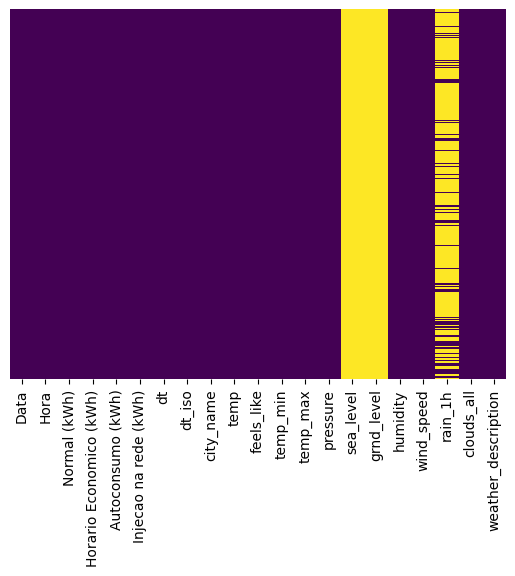

In [20]:
sns.heatmap(df_final_v1.isnull(),yticklabels= False,  cbar = False, cmap = 'viridis')

Opção inner

In [21]:
df = df_final_v1
df

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,dt_iso,city_name,temp,...,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-29,0,0.000,0.000,0.0,None,1632873600,2021-09-29 00:00:00,local,13.97,...,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds
1,2021-09-29,1,0.000,0.000,0.0,None,1632877200,2021-09-29 01:00:00,local,13.48,...,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds
2,2021-09-29,2,0.000,0.000,0.0,None,1632880800,2021-09-29 02:00:00,local,12.93,...,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds
3,2021-09-29,3,0.000,0.000,0.0,None,1632884400,2021-09-29 03:00:00,local,12.61,...,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds
4,2021-09-29,4,0.000,0.000,0.0,None,1632888000,2021-09-29 04:00:00,local,12.61,...,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,2022-12-31,19,1.693,0.000,0.0,None,1672513200,2022-12-31 19:00:00,local,15.70,...,15.57,15.72,1018,NaN,NaN,86,5.56,3.58,100,moderate rain
11012,2022-12-31,20,1.327,0.000,0.0,None,1672516800,2022-12-31 20:00:00,local,15.55,...,12.72,15.70,1018,NaN,NaN,87,4.47,4.20,100,heavy intensity rain
11013,2022-12-31,21,0.757,0.000,0.0,None,1672520400,2022-12-31 21:00:00,local,13.45,...,12.23,13.99,1019,NaN,NaN,93,3.29,4.23,100,heavy intensity rain
11014,2022-12-31,22,0.000,0.675,0.0,None,1672524000,2022-12-31 22:00:00,local,12.93,...,12.23,13.43,1019,NaN,NaN,94,1.49,3.90,100,moderate rain


In [22]:
df.duplicated().sum()

0

In [23]:
df.nunique()

Data                         459
Hora                          24
Normal (kWh)                1282
Horario Economico (kWh)      851
Autoconsumo (kWh)            752
Injecao na rede (kWh)          5
dt                         11016
dt_iso                     11016
city_name                      1
temp                        2382
feels_like                  2670
temp_min                     481
temp_max                     545
pressure                      41
sea_level                      0
grnd_level                     0
humidity                      82
wind_speed                   771
rain_1h                      367
clouds_all                   101
weather_description            8
dtype: int64

In [24]:
df['city_name']

0        local
1        local
2        local
3        local
4        local
         ...  
11011    local
11012    local
11013    local
11014    local
11015    local
Name: city_name, Length: 11016, dtype: object

In [25]:
df.drop(['city_name'], inplace=True, axis=1)
df.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-29,0,0.0,0.0,0.0,None,1632873600,2021-09-29 00:00:00,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds
1,2021-09-29,1,0.0,0.0,0.0,None,1632877200,2021-09-29 01:00:00,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds
2,2021-09-29,2,0.0,0.0,0.0,None,1632880800,2021-09-29 02:00:00,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds
3,2021-09-29,3,0.0,0.0,0.0,None,1632884400,2021-09-29 03:00:00,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds
4,2021-09-29,4,0.0,0.0,0.0,None,1632888000,2021-09-29 04:00:00,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds


In [26]:
# Sea_level e grnd_level são ambas colunas vazias, portanto vamos fazer drop

df.drop(['sea_level'], inplace = True, axis = 1)
df.drop(['grnd_level'], inplace = True, axis = 1)

In [27]:
print(df['rain_1h'].value_counts())
print('----------------------------------------------------------------------------------------------------------------')

# temos 10278 valores vazios para este dado
print(df[df['rain_1h'].isna()])

#subestituir os valores vazios por zero
df['rain_1h'] = df['rain_1h'].map(lambda x: 0 if pd.isna(x) else x)

rain_1h
0.12    69
0.16    57
0.15    54
0.14    54
0.11    51
        ..
6.36     1
3.54     1
3.89     1
3.65     1
4.07     1
Name: count, Length: 367, dtype: int64
----------------------------------------------------------------------------------------------------------------
             Data  Hora  Normal (kWh)  Horario Economico (kWh)  \
0      2021-09-29     0         0.000                      0.0   
1      2021-09-29     1         0.000                      0.0   
2      2021-09-29     2         0.000                      0.0   
3      2021-09-29     3         0.000                      0.0   
4      2021-09-29     4         0.000                      0.0   
...           ...   ...           ...                      ...   
11002  2022-12-31    10         1.074                      0.0   
11003  2022-12-31    11         0.360                      0.0   
11004  2022-12-31    12         0.402                      0.0   
11006  2022-12-31    14         1.060                      

<Axes: >

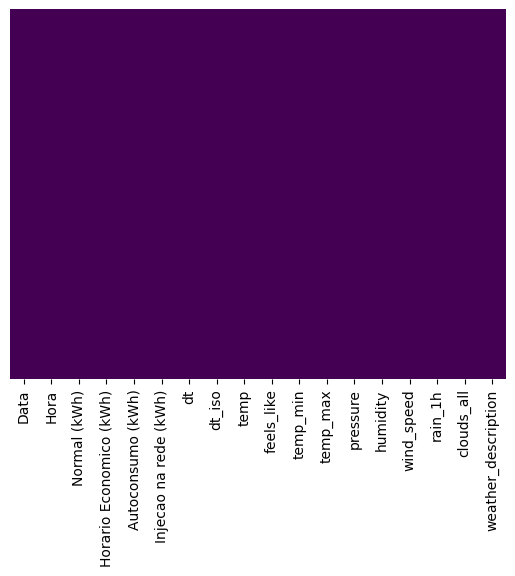

In [29]:
sns.heatmap(df.isnull(),yticklabels= False,  cbar = False, cmap = 'viridis')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     11016 non-null  object        
 1   Hora                     11016 non-null  int64         
 2   Normal (kWh)             11016 non-null  float64       
 3   Horario Economico (kWh)  11016 non-null  float64       
 4   Autoconsumo (kWh)        11016 non-null  float64       
 5   Injecao na rede (kWh)    11016 non-null  object        
 6   dt                       11016 non-null  int64         
 7   dt_iso                   11016 non-null  datetime64[ns]
 8   temp                     11016 non-null  float64       
 9   feels_like               11016 non-null  float64       
 10  temp_min                 11016 non-null  float64       
 11  temp_max                 11016 non-null  float64       
 12  pressure                 11016 n

In [31]:
df.drop(['Data'], inplace = True, axis = 1)
df.drop(['Hora'], inplace = True, axis = 1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Normal (kWh)             11016 non-null  float64       
 1   Horario Economico (kWh)  11016 non-null  float64       
 2   Autoconsumo (kWh)        11016 non-null  float64       
 3   Injecao na rede (kWh)    11016 non-null  object        
 4   dt                       11016 non-null  int64         
 5   dt_iso                   11016 non-null  datetime64[ns]
 6   temp                     11016 non-null  float64       
 7   feels_like               11016 non-null  float64       
 8   temp_min                 11016 non-null  float64       
 9   temp_max                 11016 non-null  float64       
 10  pressure                 11016 non-null  int64         
 11  humidity                 11016 non-null  int64         
 12  wind_speed               11016 n

In [33]:
df['Year']   = df['dt_iso'].dt.year
df['Month']  = df['dt_iso'].dt.month
df['Day']    = df['dt_iso'].dt.day

df['Hour']   = df['dt_iso'].dt.hour
df['Minute'] = df['dt_iso'].dt.minute
df['Second'] = df['dt_iso'].dt.second

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Normal (kWh)             11016 non-null  float64       
 1   Horario Economico (kWh)  11016 non-null  float64       
 2   Autoconsumo (kWh)        11016 non-null  float64       
 3   Injecao na rede (kWh)    11016 non-null  object        
 4   dt                       11016 non-null  int64         
 5   dt_iso                   11016 non-null  datetime64[ns]
 6   temp                     11016 non-null  float64       
 7   feels_like               11016 non-null  float64       
 8   temp_min                 11016 non-null  float64       
 9   temp_max                 11016 non-null  float64       
 10  pressure                 11016 non-null  int64         
 11  humidity                 11016 non-null  int64         
 12  wind_speed               11016 n

In [35]:
df.drop('dt_iso', inplace=True, axis=1)

In [36]:
df['weather_description'].value_counts()

weather_description
sky is clear            3010
overcast clouds         2430
light rain              1662
broken clouds           1413
scattered clouds        1148
few clouds               731
moderate rain            562
heavy intensity rain      60
Name: count, dtype: int64

In [37]:
# Criar os atributos binários
df['sky is clear']             = ( df['weather_description'].str.contains('sky is clear') ).astype(int)
df['overcast clouds']          = ( df['weather_description'].str.contains('overcast clouds') ).astype(int)
df['light rain']               = ( df['weather_description'].str.contains('light rain') ).astype(int)
df['broken clouds']            = ( df['weather_description'].str.contains('broken clouds') ).astype(int)
df['scattered clouds']         = ( df['weather_description'].str.contains('scattered clouds') ).astype(int)
df['few clouds']               = ( df['weather_description'].str.contains('few clouds') ).astype(int)
df['moderate rain']            = ( df['weather_description'].str.contains('moderate rain') ).astype(int)
df['heavy intensity rain']     = ( df['weather_description'].str.contains('heavy intensity rain') ).astype(int)

In [38]:
df.drop(['weather_description'], inplace = True, axis = 1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horario Economico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injecao na rede (kWh)    11016 non-null  object 
 4   dt                       11016 non-null  int64  
 5   temp                     11016 non-null  float64
 6   feels_like               11016 non-null  float64
 7   temp_min                 11016 non-null  float64
 8   temp_max                 11016 non-null  float64
 9   pressure                 11016 non-null  int64  
 10  humidity                 11016 non-null  int64  
 11  wind_speed               11016 non-null  float64
 12  rain_1h                  11016 non-null  float64
 13  clouds_all               11016 non-null  int64  
 14  Year                  

In [40]:
df.nunique()

Normal (kWh)                1282
Horario Economico (kWh)      851
Autoconsumo (kWh)            752
Injecao na rede (kWh)          5
dt                         11016
temp                        2382
feels_like                  2670
temp_min                     481
temp_max                     545
pressure                      41
humidity                      82
wind_speed                   771
rain_1h                      368
clouds_all                   101
Year                           2
Month                         12
Day                           31
Hour                          24
Minute                         1
Second                         1
sky is clear                   2
overcast clouds                2
light rain                     2
broken clouds                  2
scattered clouds               2
few clouds                     2
moderate rain                  2
heavy intensity rain           2
dtype: int64

In [ ]:
for col in df:
    
    print (df[col].value_counts())
    print("----------------------------------------------------------------")